Code To Make UVJ Diagrams From EAZY data

['NUMBER', 'X_IMAGE', 'Y_IMAGE', 'ALPHA_J2000', 'DELTA_J2000', 'MAG_APER_F277W+F356W+F444W', 'FLUX_APER_F277W+F356W+F444W', 'MAGERR_APER_F277W+F356W+F444W', 'FLUXERR_APER_F277W+F356W+F444W', 'MAG_AUTO_F277W+F356W+F444W', 'MAGERR_AUTO_F277W+F356W+F444W', 'FLUX_AUTO_F277W+F356W+F444W', 'FLUXERR_AUTO_F277W+F356W+F444W', 'MAG_BEST_F277W+F356W+F444W', 'MAGERR_BEST_F277W+F356W+F444W', 'MAG_ISO_F277W+F356W+F444W', 'MAGERR_ISO_F277W+F356W+F444W', 'KRON_RADIUS_F277W+F356W+F444W', 'FLUX_RADIUS_F277W+F356W+F444W', 'FWHM_IMAGE_F277W+F356W+F444W', 'CLASS_STAR_F277W+F356W+F444W', 'SNR_WIN_F277W+F356W+F444W', 'ELONGATION_F277W+F356W+F444W', 'THETA_IMAGE_F277W+F356W+F444W', 'A_IMAGE_F277W+F356W+F444W', 'B_IMAGE_F277W+F356W+F444W', 'FLAGS_F277W+F356W+F444W', 'ISOAREA_IMAGE_F277W+F356W+F444W', 'MAG_APER_F435W', 'FLUX_APER_F435W', 'MAGERR_APER_F435W', 'FLUXERR_APER_F435W', 'MAG_AUTO_F435W', 'MAGERR_AUTO_F435W', 'FLUX_AUTO_F435W', 'FLUXERR_AUTO_F435W', 'MAG_BEST_F435W', 'MAGERR_BEST_F435W', 'MAG_ISO_F435W

ValueError: Supply a 'c' argument or a 'color' kwarg but not both; they differ but their functionalities overlap.

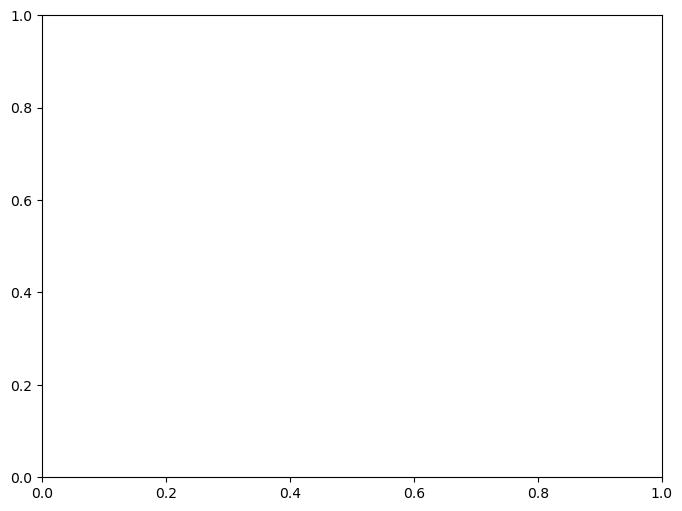

In [19]:
from astropy.io import fits
from astropy.table import Table
from astropy.table import join
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#First need to import table 
hdulist = fits.open("/raid/scratch/work/Griley/GALFIND_WORK/Catalogues/v13/ACS_WFC+NIRCam/JADES-DR3-GS-East/(0.32)as/JADES-DR3-GS-East_MASTER_Sel-F277W+F356W+F444W_v13.fits")
table_objects = Table(hdulist[1].data)
table_EAZY = Table(hdulist[2].data)
table_selection = Table(hdulist[3].data)
hdulist.close()
print(table_objects.colnames)
print(table_selection.colnames)

#Next, need to select only galaxies
mask = table_selection['Austin+25_EAZY_fsps_larson_zfree_0.32as'] == True
table_objects = table_objects[mask]
table_EAZY = table_EAZY[mask]

#Making The Plot
#First need to get UV and VJ from EAZY and convert to AbMags
U_flux = table_EAZY["U_rf_flux_fsps_larson_zfree"]
V_flux = table_EAZY["V_rf_flux_fsps_larson_zfree"]
J_flux = table_EAZY["J_rf_flux_fsps_larson_zfree"]

uv = -2.5 * np.log10(U_flux / V_flux)  # Convert to AB magnitude
vj = -2.5 * np.log10(V_flux / J_flux)  # Convert to AB magnitude

# Masks for the two groups
mask =  np.isfinite(uv) & np.isfinite(vj)
#mask_low_sfr = np.isfinite(uv) & np.isfinite(vj)  #& np.isfinite(sfr_ratio) & (sfr_ratio < 2)
#mask_high_sfr = np.isfinite(uv) & np.isfinite(vj) #& (sfr_ratio >= 2) & np.isfinite(sfr_ratio)

#colour coding by redshift
redshift = table_EAZY["zbest_fsps_larson_zfree"]

#---------trying to add those lines!
plt.figure(figsize=(8, 6), facecolor = 'white')
sc = plt.scatter(vj[mask], uv[mask], c = (redshift),  alpha=0.6, edgecolor='none')

# Define V-J range for the sloped line
vj_line = np.linspace(1.25, 1.6, 100)
uv_line = 0.88 * vj_line + 0.19

# Plot the sloped boundary
plt.plot(vj_line, uv_line, 'k--')

# Plot horizontal line U-V = 1.3 (for V-J < 1.6)
plt.hlines(1.3, xmin=-1.5, xmax=1.25, colors='k', linestyles='--', label='U−V > 1.3')

# Plot vertical line V-J = 1.6 (for U-V > 1.3)
plt.vlines(1.6, ymin=1.6, ymax=3, colors='k', linestyles='--', label='V−J < 1.6')

# Set plot limits to focus on relevant region
plt.xlim(-1.5, 4)
plt.ylim(-1.5, 3)
plt.colorbar(sc, label='redshift')

plt.xlabel("V–J (AB mag)")
plt.ylabel("U–V (AB mag)")
plt.title("UVJ Diagram with Quiescent Region for JADES-DR3_GS-East")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()





